In [20]:
import pandas as pd

import numpy as np
import seaborn as sns

In [21]:
%matplotlib inline

### 拉勾网数据分析
在拉勾求职网，以 机器学习 关键字，分别对北京，上海，广州，深圳，杭州五个城市进行搜索，得到的数据如下，现在做个简单分析。

In [22]:
train = pd.read_csv('./lagou/all.csv')

In [23]:
train.head()

,businessZones,city,companyFullName,companyId,companyLabelList,companyLogo,companyShortName,companySize,createTime,deliver,...,promotionScoreExplain,publisherId,resumeProcessDay,resumeProcessRate,salary,score,secondType,stationname,subwayline,workYear
0,"西直门,动物园,官园",北京,北京沃丰时代数据科技有限公司,25439,"股票期权,高成长,云服务,高并发",i/image/M00/5A/F5/CgpFT1mNZfWAXLGYAAAM0qJze1U9...,Udesk－企业级智能客服平台,150-500人,2018-06-22 09:40:29,0,...,NaN,2674637,1,100,30k-50k,0,数据开发,车公庄西,2号线,3-5年
1,"团结湖,三里屯,工体",北京,北京瓴岳信息技术有限公司,110502,"14薪,弹性工作,零食水果,午餐晚餐",i/image/M00/8A/D7/Cgp3O1h3K6OAKU4FAACWYn0eTvU4...,洋钱罐,150-500人,2018-06-21 10:32:16,0,...,NaN,6722010,1,87,15k-30k,0,数据开发,团结湖,10号线,1-3年
2,NaN,北京,北京飞拓互联科技有限公司,21732,"绩效奖金,岗位晋升,股票期权,扁平管理",i/image2/M00/2E/FE/CgotOVo4jPCAY3gDAAAOOITNEpw...,FitTime睿健时代,150-500人,2018-06-22 13:17:47,0,...,NaN,248588,0,0,30k-50k,0,数据开发,望京东,15号线,3-5年
3,NaN,北京,北京京东世纪贸易有限公司,18139,"五险一金,带薪年假,免费班车,定期体检",i/image2/M00/13/95/CgotOVnwNqeAFbmnAABaH5Q_vVE...,京东集团,2000人以上,2018-06-20 09:47:02,0,...,NaN,8643437,1,84,30k-60k,0,数据开发,NaN,NaN,3-5年
4,"望京,来广营",北京,北京数美时代科技有限公司,82991,"年底双薪,大数据,带薪年假,通讯津贴",i/image/M00/76/C2/CgqKkVg2fVCASEreAABS01Upo_A2...,数美,150-500人,2018-06-22 14:45:02,0,...,NaN,2117266,1,100,25k-50k,0,数据开发,来广营,14号线东段,1-3年


In [24]:
train.describe()

,companyId,deliver,explain,gradeDescription,isSchoolJob,lastLogin,latitude,longitude,pcShow,plus,positionId,promotionScoreExplain,publisherId,resumeProcessDay,resumeProcessRate,score
count,708.000000,708.0,0.0,0.0,708.000000,7.080000e+02,699.000000,699.000000,708.0,0.0,7.080000e+02,0.0,7.080000e+02,708.000000,708.000000,708.0
mean,90401.190678,0.0,NaN,NaN,0.087571,1.529481e+12,32.676793,106.300014,0.0,NaN,4.109046e+06,NaN,5.169087e+06,0.823446,41.016949,0.0
std,98254.746476,0.0,NaN,NaN,0.282869,1.353363e+09,14.779712,33.127943,0.0,NaN,5.797704e+05,NaN,3.432063e+06,0.789724,42.285515,0.0
min,38.000000,0.0,NaN,NaN,0.000000,1.498810e+12,0.000000,0.000000,0.0,NaN,9.294060e+05,NaN,2.081000e+03,0.000000,0.000000,0.0
25%,7004.250000,0.0,NaN,NaN,0.000000,1.529638e+12,30.183515,114.033168,0.0,NaN,3.846509e+06,NaN,1.979568e+06,0.000000,0.000000,0.0
50%,50702.000000,0.0,NaN,NaN,0.000000,1.529657e+12,39.904592,116.344462,0.0,NaN,4.256552e+06,NaN,5.726660e+06,1.000000,20.500000,0.0
75%,144037.000000,0.0,NaN,NaN,0.000000,1.529669e+12,39.994260,116.522870,0.0,NaN,4.567062e+06,NaN,8.264044e+06,1.000000,94.250000,0.0
max,401537.000000,0.0,NaN,NaN,1.000000,1.529690e+12,116.331398,121.993410,0.0,NaN,4.760709e+06,NaN,1.108768e+07,8.000000,100.000000,0.0


如上信息，共计有708个招聘职位，每个职位有43个属性，其中有缺失值。下面对其中比较重要的信息进行可视化分析。

##### 不同城市的职位数目

In [25]:
job_num = train['city'].value_counts()

In [26]:
job_num

北京    394
上海    125
深圳    103
杭州     65
广州     21
Name: city, dtype: int64

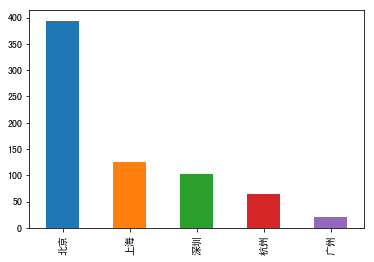

In [27]:
job_num.plot.bar()

对照上图，可以看到五个城市的职位数目区别，其中北京比其他四个城市的机器学习岗位加起来都多，如果想从事机器学习方面的工作，那么北京的机会会更多，同时能学到的东西也会更多。

#### 学历要求

In [28]:
education = train['education'].value_counts()

In [29]:
education

本科    455
硕士    219
不限     20
博士      9
大专      5
Name: education, dtype: int64

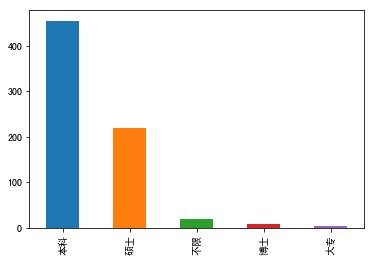

In [30]:
education.plot.bar()

如上，大部分要求的还是本科生，比其他学历加起来的总和还要多，说明本科也可以从事机器学习工作，取决于自身的知识和努力，当然，读个研究生最好。毕竟本科生毕业后直接从事机器学习的人不多，有大部分是转行的，因此也需要在工作中付出更多的努力。

In [31]:
train.groupby(['city','education']).size()

city  education
上海    不限             3
      博士             2
      大专             3
      本科            74
      硕士            43
北京    不限            10
      博士             3
      本科           269
      硕士           112
广州    本科            12
      硕士             9
杭州    不限             5
      博士             2
      本科            39
      硕士            19
深圳    不限             2
      博士             2
      大专             2
      本科            61
      硕士            36
dtype: int64

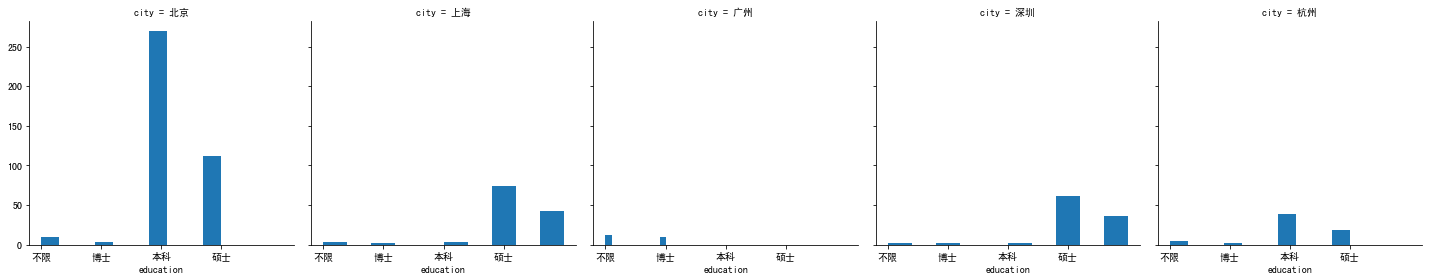

In [32]:
# 不同城市对学历的要求
g = sns.FacetGrid(train, col='city', size=4, aspect=1)
g.map(plt.hist, 'education')

#### 工作经验的要求

In [33]:
work_year = train['workYear'].value_counts()

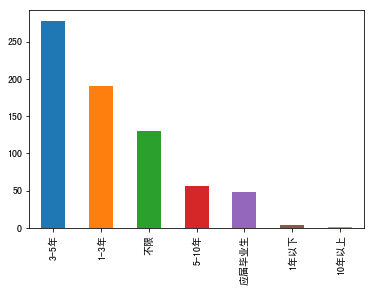

In [34]:
work_year.plot.bar()

工作3-5年的人，有比较丰富的经验，确实是各公司青睐的工作人员。其中1年以下， 10年以上机会没有，侧面说明不呆满一年跳槽也比较难找工作，10年以上也基本没有合适的岗位。

In [35]:
train.groupby(['city','workYear']).size()

city  workYear
上海    1-3年         28
      3-5年         56
      5-10年        11
      不限           22
      应届毕业生         8
北京    1-3年        105
      10年以上         1
      1年以下          2
      3-5年        153
      5-10年        35
      不限           66
      应届毕业生        32
广州    1-3年          8
      3-5年          8
      5-10年         1
      不限            3
      应届毕业生         1
杭州    1-3年         14
      1年以下          1
      3-5年         18
      5-10年         4
      不限           24
      应届毕业生         4
深圳    1-3年         36
      1年以下          1
      3-5年         43
      5-10年         5
      不限           15
      应届毕业生         3
dtype: int64

#### 薪资水平及各因素的影响

In [36]:
salary = train['salary'].value_counts()

因为薪水范围太多，所以这里做个简单处理，只取最低薪资

In [37]:
train['salary_simple'] = [i[:2] for i in train['salary']]


In [38]:
# 简单进行四舍五入
salary_simple = []
for s in train['salary_simple']:
    if 'k' in s or 'K' in s:
        salary_simple.append(0)
    else:
        salary_simple.append(round(int(s)))
# train.loc[index, 'city']   
# train['salary_simple'] = salary_simple

In [39]:
for i, value in enumerate(salary_simple):
    if value < 10:
        salary_simple[i] = 0
    elif 10 <= value < 20:
        salary_simple[i] = 15
    elif 20 <= value < 30:
        salary_simple[i] = 25
    elif 30 <= value < 40:
        salary_simple[i] = 35
    else:
        salary_simple[i] = 45

In [40]:
train['salary_simple'] = salary_simple

In [41]:
salary_simple = train['salary_simple'].value_counts()

In [42]:
salary_simple

25    301
15    220
35    113
0      48
45     26
Name: salary_simple, dtype: int64

不同的城市与薪资的关系

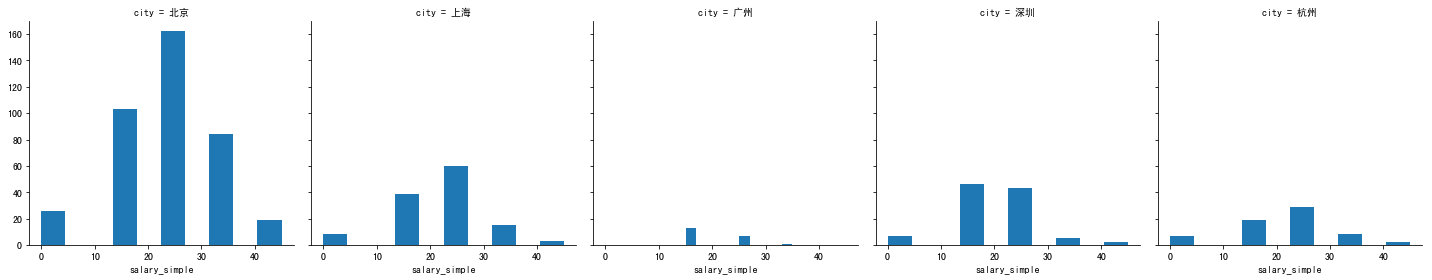

In [43]:
# 不同城市对学历的要求
g = sns.FacetGrid(train, col='city', size=4, aspect=1)
g.map(plt.hist, 'salary_simple')

#### 公司情况

In [44]:
companyFullName = train['companyShortName'].value_counts()

In [45]:
companyFullName

美团点评               31
百度                 28
新浪微博               18
蚂蚁金服集团             18
腾讯                 17
数美                 15
滴滴出行               11
京东集团               10
Gridsum 国双          9
同盾科技                9
小米                  9
好大夫在线               7
晶泰科技                6
GFT                 6
云脑科技                6
顺丰科技有限公司            5
快手                  5
洋钱罐                 5
七牛云                 5
永洪科技                5
普林科技                5
Udesk－企业级智能客服平台     5
一起科技                4
AKULAKU             4
无秘                  4
Trusfort芯盾时代        4
Coupang             4
Aibee               4
马上金融                4
平安科技                4
                   ..
中科博宏                1
源杉FIR.ai            1
猎鹰网络                1
八分量                 1
大唐移动                1
安恒信息                1
XAIRCRAFT极飞无人机      1
摩若普利                1
上海万得信息技术股份有限公司      1
知乎                  1
第三石科技               1
秀美发                 1
Terminai机慧科技        1
全视云安                1
PWC       

In [46]:
companySize = train['companySize'].value_counts()

In [47]:
companySize

2000人以上      243
150-500人     134
500-2000人    134
50-150人      113
15-50人        72
少于15人         12
Name: companySize, dtype: int64

In [48]:
financeStage = train['financeStage'].value_counts()

In [49]:
financeStage

上市公司     130
不需要融资    124
B轮       116
D轮及以上    103
A轮        94
C轮        70
天使轮       41
未融资       30
Name: financeStage, dtype: int64

#### 职位情况

In [50]:
positionName = train['positionName'].value_counts()
positionName.head(10)

机器学习工程师        83
机器学习算法工程师      63
机器学习           21
高级机器学习工程师      10
机器学习研究员         7
高级机器学习算法工程师     7
机器学习平台开发工程师     6
机器学习研发工程师       6
机器学习实习生         6
机器学习专家          6
Name: positionName, dtype: int64

In [51]:
secondType = train['secondType'].value_counts()
secondType.head(10)

数据开发         585
后端开发          70
软件开发          21
风控             5
[后端开发]         4
产品设计/需求分析      4
证券/期货          4
前端开发/移动开发      3
高端技术职位         3
硬件开发           2
Name: secondType, dtype: int64

#### 在机器学习方面的应用

In [52]:
labels = []
for label in train['industryLables']:
    if type(label) == str:
        labels.extend(label.split(','))
pd.Series(labels).value_counts().head(20)

算法        100
数据挖掘       95
深度学习       73
金融         68
广告营销       62
大数据        59
人工智能       31
数据分析       27
医疗健康       26
云计算        18
Java       18
视频         15
python     15
NLP        15
自然语言处理     13
高级         13
模式识别       11
推荐         10
信息安全        9
征信          9
dtype: int64

### boss直聘数据分析

In [53]:
train = pd.read_csv('./boss/all.csv')

In [54]:
train # 共计1425条数据，其中有一部分不相关的工作

,company,education,experience,location,position,salary
0,高德地图,本科,3-5年,北京,Android,20k-35k
1,优信集团,本科,1-3年,北京,数据分析师,10k-12k
2,腾讯,硕士,1-3年,北京,微信推荐机器学习算法工程师,18k-36k
3,百度在线,本科,5-10年,北京,Java工程师,15k-30k
4,KuickDeal,本科,5-10年,北京,高级Java开发工程师,16k-24k
5,医渡云,硕士,不限,北京,数据挖掘实习生,4k-5k
6,百度,本科,不限,北京,高级算法工程师,20k-40k
7,蚂蚁金服,本科,3-5年,北京,高级算法工程师/专家 上海、杭州、北京,15k-30k
8,赋华同创,本科,3-5年,北京,人脸识别\\目标识别算法工程师,25k-50k
9,汉云信通技术,本科,3-5年,北京,自然语言处理,17k-25k


因为数据属性不多，还是按照上述的方式简单统计一下

boss直聘的搜索范围比较广，以机器学习为关键字，会搜索到一些相关的职位。下面简单做下统计：

In [55]:
key = ['机器','学习','算法']  #留下包含这3个词的职位

In [56]:
# 删除包含某些指定字符的行
train = train[train['position'].str.contains('算法|学习|机器',regex=True)]
train

,company,education,experience,location,position,salary
2,腾讯,硕士,1-3年,北京,微信推荐机器学习算法工程师,18k-36k
6,百度,本科,不限,北京,高级算法工程师,20k-40k
7,蚂蚁金服,本科,3-5年,北京,高级算法工程师/专家 上海、杭州、北京,15k-30k
8,赋华同创,本科,3-5年,北京,人脸识别\\目标识别算法工程师,25k-50k
12,知乎,本科,应届生,北京,算法实习生,5k-6k
13,中科院自动化所,硕士,不限,北京,数据解析与深度学习工程师-海外专场,8k-10k
16,赋华同创,本科,3-5年,北京,语音识别算法工程师,20k-40k
17,车晓科技,本科,3-5年,北京,数据建模算法工程师,13k-23k
21,北京国翼天德,本科,3-5年,北京,图像算法工程师,20k-40k
22,芒果电单车,硕士,1-3年,北京,图像算法工程师,15k-25k


去掉三分之二数据之后，剩下的基本上是机器学习相关的工作了。

#### 哪些公司在招聘

In [57]:
company = train['company'].value_counts()

In [58]:
company.head(20)

腾讯            23
滴滴出行          11
阿里巴巴集团        11
华为技术有限公司      11
华为            11
网易            10
百度             8
爱奇艺            7
PonyAI小马智行     6
图普科技           5
京东集团           5
LinkDoc        5
欢聚时代           5
至真信息           5
虎彩             4
暄暄科技           4
瑞思咨询           4
阿里巴巴-UC        4
北风网            4
蚂蚁金服           4
Name: company, dtype: int64

#### 学历要求

In [59]:
education = train['education'].value_counts()
education

本科    312
硕士    196
博士     18
不限     18
大专     10
Name: education, dtype: int64

#### 工作经验

In [60]:
experience = train['experience'].value_counts()
experience

3-5年     214
1-3年     167
不限        97
5-10年     48
应届生       14
1年以内      11
10年以上      3
Name: experience, dtype: int64

#### 城市情况

In [61]:
location = train['location'].value_counts()
location

广州    144
北京    114
杭州    111
上海     99
深圳     86
Name: location, dtype: int64

#### 薪水情况

这里计算最低值加上间隔的四分之一，大部分拿到offer的应该在这附近。

In [62]:
salary_s = []
for salary in train['salary']:
    l = salary.split('-')
    first = int(l[0][:-1])
    second = int(l[1][:-1])
    salary_s.append(round(first + (second - first) / 4))
train['salary_simple'] = salary_s

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [63]:
salary = train['salary_simple'].value_counts()
salary.head(10)

25    90
19    62
31    43
38    39
18    37
22    31
12    28
29    22
24    20
16    19
Name: salary_simple, dtype: int64

去掉大于50k的值

In [64]:
train = train[train['salary_simple'] < 50]

#### 薪水与其他属性的关系

In [65]:
# 地区
train[['location', 'salary_simple']].groupby(['location'], as_index=False).mean().sort_values(by='salary_simple', ascending=False)

,location,salary_simple
1,北京,25.509259
4,深圳,24.617284
0,上海,23.408163
2,广州,22.292857
3,杭州,20.271028


In [66]:
# 学习
train[['education', 'salary_simple']].groupby(['education'], as_index=False).mean().sort_values(by='salary_simple', ascending=False)

,education,salary_simple
1,博士,29.357143
4,硕士,24.319149
3,本科,22.667763
2,大专,17.000000
0,不限,16.055556


In [67]:
train[['experience', 'salary_simple']].groupby(['experience'], as_index=False).mean().sort_values(by='salary_simple', ascending=False)

,experience,salary_simple
1,10年以上,38.000000
4,5-10年,31.682927
3,3-5年,26.214634
0,1-3年,20.884848
5,不限,19.381443
2,1年以内,12.909091
6,应届生,11.000000


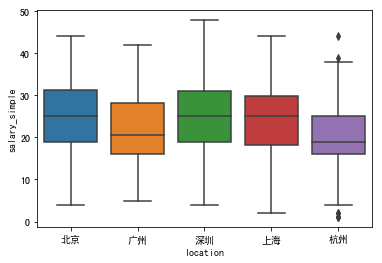

In [68]:
sns.boxplot(x="location", y="salary_simple", data=train)

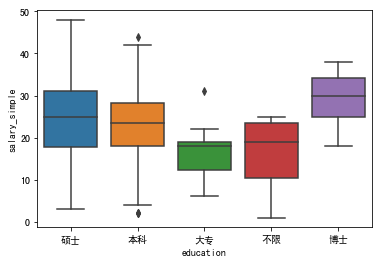

In [69]:
sns.boxplot(x="education", y="salary_simple", data=train)

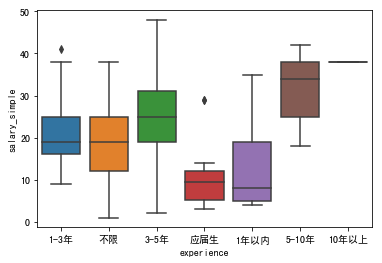

In [70]:
sns.boxplot(x="experience", y="salary_simple", data=train)

### 总结

从两个招聘APP来说，给我的感觉是boss直聘稍微混乱一些，拉勾在数据上的规范性和真实性上感觉更大，至于方便程度来说，还得不用人去体验。  
从机器学习这个岗位来说，北京的需求确实比其他四市要多，跟环境，人才的聚集也有很大的关系。目前的普遍印象是研究生从事机器学习的人数要多，但从招聘情况看，侧面反映本科从事机器学习的人更多。1-5年经验的人才需求比较大，跳槽的话，工作经验在这个范围内比较合适。